In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2


In [31]:
model = keras.models.load_model(
    filepath="../LaneNet/full_CNN_model.h5")



In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 80, 160, 3)       12        
 ormalization)                                                   
                                                                 
 Conv1 (Conv2D)              (None, 78, 158, 8)        224       
                                                                 
 Conv2 (Conv2D)              (None, 76, 156, 16)       1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 38, 78, 16)       0         
 )                                                               
                                                                 
 Conv3 (Conv2D)              (None, 36, 76, 16)        2320      
                                                                 
 dropout (Dropout)           (None, 36, 76, 16)        0

In [35]:
image=cv2.imread("../images/test_image.jpg")
original_image=np.array(image)
def resize_image(image):
    #print(image.shape)
    image=cv2.resize(image,(160,80))
    #print(image.shape)
    small_img = cv2.resize(image, (160, 80)) 
    #print(plt.imshow(image))
    small_img = np.array(small_img)
    small_img = small_img[None, :, :, :]
    return small_img,image
    #print(small_img.shape)


(704, 1279)
AxesImage(54,36;334.8x217.44)


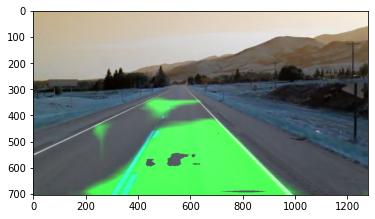

In [39]:

small_img, image = resize_image(image)
res = model.predict(small_img)
lane = res[0]*255

lane = cv2.resize(lane, (1279, 704))
print(lane.shape)
blanks = np.zeros((lane.shape[0], lane.shape[1], 3))
blanks[:, :, 1] = blanks[:, :, 1]+lane[:, :]

lane_image = blanks.astype('uint8')

result = cv2.addWeighted(original_image, 1, lane_image, 1, 0)
print(plt.imshow(result))


In [42]:
vid = cv2.VideoCapture("../videos/solidWhiteRight.mp4")
while(vid.isOpened()):
    ret, image = vid.read()

    if ret == True:
        original_image=np.array(image)
        original_image_shape=original_image.shape
        small_img, image = resize_image(image)
        res = model.predict(small_img)
        lane = res[0]*255

        lane = cv2.resize(lane, (original_image_shape[1], original_image_shape[0]))
        print(lane.shape)
        blanks = np.zeros((lane.shape[0], lane.shape[1], 3))
        blanks[:, :, 1] = blanks[:, :, 1]+lane[:, :]

        lane_image = blanks.astype('uint8')

        result = cv2.addWeighted(original_image, 1, lane_image, 1, 0)
        #print(plt.imshow(result))
        cv2.imshow('result',result)



        #print(plt.imshow(result))
        if(cv2.waitKey(1) == ord('q')):
            break
    else:
        break


        
   
vid.release()
cv2.destroyAllWindows()


(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)